IMPORTACION DE LIBRERIAS

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
pd.options.display.max_columns = None



# FEATURE ENGINEERING :

In [60]:
#Insertando la data de entrenamiento
dftrain = pd.read_csv("Archivos train y test/hospitalizaciones_train.csv")
dftrain.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


### EDA :

In [61]:
#explorando las variables unicas
for i in range(15):
    print (dftrain.columns[i])
    print(dftrain.iloc[:,i].unique())
    print("\n")

Available Extra Rooms in Hospital
[ 4  2  7  3  5 10  6  1 21  8 11 13  9 14 24  0 12 20]


Department
['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']


Ward_Facility_Code
['D' 'B' 'E' 'F' 'A' 'C']


doctor_name
['Dr Sophia' 'Dr Olivia' 'Dr Mark' 'Dr John' 'Dr Sarah' 'Dr Sam'
 'Dr Nathan' 'Dr Simon' 'Dr Isaac']


staff_available
[ 0  2  8  7 10  5  9  3  6  4  1]


patientid
[33070 34808 44577 ... 40881 51342 63598]


Age
['41-50' '31-40' '21-30' '71-80' '11-20' '51-60' '61-70' '81-90' '91-100'
 '0-10']


gender
['Female' 'Male' 'Other']


Type of Admission
['Trauma' 'Urgent' 'Emergency']


Severity of Illness
['Extreme' 'Minor' 'Moderate']


health_conditions
['Diabetes' 'Heart disease' 'None' 'Other' 'Asthama' 'High Blood Pressure']


Visitors with Patient
[ 4  2  3 11  9  6  8 12  5  1 14  7 13 10 22 18  0 16 20 21 19 23 15 24
 17 30 32 25]


Insurance
['Yes' 'No']


Admission_Deposit
[2966.408696 3554.835677 5624.733654 ... 3816.99421  3841.577491
 4329.04

In [62]:
# No hay valores nulos
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [63]:
# No hay duplicados
dftrain[dftrain.duplicated()]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)


## FEATURE ENCODING :
### CONVIRTIENDO A VALORES NUMÉRICOS LOS DATOS CATEGÓRICOS
### ESCALAMIENTO DE DATOS NUMÉRICOS

In [64]:
#Encodign de la columna Available Extra Rooms in Hospital
scaler = MinMaxScaler() 
dftrain["Available Extra Rooms in Hospital_encoded"]=scaler.fit_transform(dftrain[["Available Extra Rooms in Hospital"]])

In [65]:
#Encoding de la columna Department
enc = OneHotEncoder(sparse=False)
departamentos=dftrain["Department"].values.reshape(-1,1)
enc.fit(departamentos)
enc2=enc.transform(departamentos)
print(enc.categories_)
dftrain["gynecoloy_encoded"]=enc2[:,0]
dftrain["anesthesia_encoded"]=enc2[:,1]
dftrain["TB & Chest disease:_encoded"]=enc2[:,2]
dftrain["radiotherapy_encoded"]=enc2[:,3]
dftrain["surgery_encoded"]=enc2[:,4]

[array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'], dtype=object)]


In [66]:
#Encoding de la columna ward facility code
enc = OneHotEncoder(sparse=False)
wardcode=dftrain["Ward_Facility_Code"].values.reshape(-1,1)
enc.fit(wardcode)
enc2=enc.transform(wardcode)
print(enc.categories_)
dftrain["A_encoded"]=enc2[:,0]
dftrain["B_encoded"]=enc2[:,1]
dftrain["C_encoded"]=enc2[:,2]
dftrain["D_encoded"]=enc2[:,3]
dftrain["E_encoded"]=enc2[:,4]
dftrain["F_encoded"]=enc2[:,5]


[array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)]


In [67]:
#Encoding de la columna doctor_name
enc = OneHotEncoder(sparse=False)
wardcode=dftrain["doctor_name"].values.reshape(-1,1)
enc.fit(wardcode)
enc2=enc.transform(wardcode)
print(enc.categories_)
dftrain["Sophia_encoded"]=enc2[:,0]
dftrain["Olivia_encoded"]=enc2[:,1]
dftrain["Mark_encoded"]=enc2[:,2]
dftrain["John_encoded"]=enc2[:,3]
dftrain["Sarah_encoded"]=enc2[:,4]
dftrain["Sam_encoded"]=enc2[:,5]
dftrain["Nathan_encoded"]=enc2[:,6]
dftrain["Simon_encoded"]=enc2[:,7]
dftrain["Isaac_encoded"]=enc2[:,8]

['Dr Sophia' 'Dr Olivia' 'Dr Mark' 'Dr John' 'Dr Sarah' 'Dr Sam'
 'Dr Nathan' 'Dr Simon' 'Dr Isaac']

[array(['Dr Isaac', 'Dr John', 'Dr Mark', 'Dr Nathan', 'Dr Olivia',
       'Dr Sam', 'Dr Sarah', 'Dr Simon', 'Dr Sophia'], dtype=object)]


['Dr SophiaDr OliviaDr MarkDr JohnDr SarahDr SamDr NathanDr SimonDr Isaac']

In [68]:
#Encoding de la columna staff_available
bins=[-1,0,10]
labels=[0,1]
cats=pd.cut(dftrain["staff_available"],bins, labels = labels)
dftrain["cats staff_available"]=cats
dftrain["cats staff_available"]=pd.factorize(dftrain['cats staff_available'])[0]

In [69]:
#Encoding de la columna age y reescalando con MinMax
y_encoder = LabelEncoder().fit(dftrain['Age'])
dftrain["Age_encoded"] = y_encoder.transform(dftrain['Age'])
scaler = MinMaxScaler() 
dftrain["Age_encoded"]=scaler.fit_transform(dftrain[["Age_encoded"]])

In [70]:
#Encoding de la columna gender
enc = OneHotEncoder(sparse=False)
genero=dftrain["gender"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftrain["Female_encoded"]=enc2[:,0]
dftrain["Male_encoded"]=enc2[:,1]
dftrain["Other_encoded"]=enc2[:,2]

[array(['Female', 'Male', 'Other'], dtype=object)]


In [71]:
#Encoding de la columna Type of Admission
enc = OneHotEncoder(sparse=False)
genero=dftrain["Type of Admission"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftrain["Trauma_encoded"]=enc2[:,0]
dftrain["Urgent_encoded"]=enc2[:,1]
dftrain["Emergency_encoded"]=enc2[:,2]

[array(['Emergency', 'Trauma', 'Urgent'], dtype=object)]


In [72]:
#Encoding de la columna Severity of Illness y haciendo MinMaxScaler() 
dftrain["Severity of Illness_encoded"]=dftrain["Severity of Illness"]
dftrain["Severity of Illness_encoded"].replace("Minor",0,inplace=True)
dftrain["Severity of Illness_encoded"].replace("Moderate",1,inplace=True)
dftrain["Severity of Illness_encoded"].replace("Extreme",2,inplace=True)
scaler = MinMaxScaler() 
dftrain["Severity of Illness_encoded"]=scaler.fit_transform(dftrain[["Severity of Illness_encoded"]])

In [73]:
#Encoding de la columna health_conditions
enc = OneHotEncoder(sparse=False)
genero=dftrain["health_conditions"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftrain["Diabetes_encoded"]=enc2[:,0]
dftrain["Heart disease_encoded"]=enc2[:,1]
dftrain["None_encoded"]=enc2[:,2]
dftrain["hcOther_encoded"]=enc2[:,3]
dftrain["Asthama_encoded"]=enc2[:,4]
dftrain["High Blood Pressure_encoded"]=enc2[:,5]


[array(['Asthama', 'Diabetes', 'Heart disease', 'High Blood Pressure',
       'None', 'Other'], dtype=object)]


In [74]:
#Encodign de la columna Visitors with Patient
scaler = MinMaxScaler() 
dftrain["Visitors with Patient_encoded"]=scaler.fit_transform(dftrain[["Visitors with Patient"]])

In [75]:
#Encodign de la columna Insurance
y_encoder = LabelEncoder()
dftrain["Insurance_encoded"] = y_encoder.fit_transform(dftrain['Insurance'])

In [76]:
#Encodign columan Admission_Deposit y reescalando con StandarScaler
scaler=StandardScaler()
dftrain["Admission_Deposit_encoded"]= scaler.fit_transform(dftrain[["Admission_Deposit"]])

In [77]:
#Encoding de la columna Stay (in days) a binario
bins=[-1,8,51]
labels=[0,1]
cats=pd.cut(dftrain["Stay (in days)"],bins, labels = labels)
dftrain["cats stay"]=cats
dftrain["cats stay"]=pd.factorize(dftrain['cats stay'])[0]
dftrain.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Available Extra Rooms in Hospital_encoded,gynecoloy_encoded,anesthesia_encoded,TB & Chest disease:_encoded,radiotherapy_encoded,surgery_encoded,A_encoded,B_encoded,C_encoded,D_encoded,E_encoded,F_encoded,Sophia_encoded,Olivia_encoded,Mark_encoded,John_encoded,Sarah_encoded,Sam_encoded,Nathan_encoded,Simon_encoded,Isaac_encoded,cats staff_available,Age_encoded,Female_encoded,Male_encoded,Other_encoded,Trauma_encoded,Urgent_encoded,Emergency_encoded,Severity of Illness_encoded,Diabetes_encoded,Heart disease_encoded,None_encoded,hcOther_encoded,Asthama_encoded,High Blood Pressure_encoded,Visitors with Patient_encoded,Insurance_encoded,Admission_Deposit_encoded,cats stay
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.444444,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.1250,1,-1.677467,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0625,0,-1.115679,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0.083333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.222222,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0625,1,0.860510,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.1250,0,0.086622,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.777778,0.0,1.0,0.0,0.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0625,0,0.425666,1


## PRIMERA MUESTRA CON OUTLIER

In [78]:
#Obtenemos el dataframe final de entrenamiento listo para su modelado
dftrainfinal=dftrain.drop(columns=list(dftrain.columns)[0:15]) # 41000x40
dftrainfinalx=dftrainfinal.drop(columns="cats stay") # 41000x39
dftrainfinaly=dftrainfinal["cats stay"] # 41000x1

In [79]:
#buscando outliers de la columna Admission_Deposit_encoded" despues de reescalado 
dftrainfinal[abs(dftrainfinal["Admission_Deposit_encoded"])>3]

,Available Extra Rooms in Hospital_encoded,gynecoloy_encoded,anesthesia_encoded,TB & Chest disease:_encoded,radiotherapy_encoded,surgery_encoded,A_encoded,B_encoded,C_encoded,D_encoded,E_encoded,F_encoded,Sophia_encoded,Olivia_encoded,Mark_encoded,John_encoded,Sarah_encoded,Sam_encoded,Nathan_encoded,Simon_encoded,Isaac_encoded,cats staff_available,Age_encoded,Female_encoded,Male_encoded,Other_encoded,Trauma_encoded,Urgent_encoded,Emergency_encoded,Severity of Illness_encoded,Diabetes_encoded,Heart disease_encoded,None_encoded,hcOther_encoded,Asthama_encoded,High Blood Pressure_encoded,Visitors with Patient_encoded,Insurance_encoded,Admission_Deposit_encoded,cats stay
357,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.222222,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.12500,1,3.813695,1
370,0.166667,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.888889,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.06250,1,3.306872,1
721,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.222222,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.06250,1,3.401226,0
732,0.083333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.222222,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.06250,1,3.252509,1
797,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.222222,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.12500,1,3.812781,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409524,0.125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.222222,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.06250,0,4.418328,1
409557,0.250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.06250,1,3.560882,0
409560,0.125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.06250,0,3.127523,1
409788,0.083333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.06250,0,3.624341,1


## PRIMERA MUESTRA SIN OUTLIER

In [80]:
#Obtenemos el dataframe de entrenamiento listo para su modelado sin outliers
dftrainfinalno=dftrainfinal[abs(dftrainfinal["Admission_Deposit_encoded"])<3] # 406050 x 40
dftrainfinalnox=dftrainfinalno.drop(columns="cats stay") # 406050 x 39
dftrainfinalnoy=dftrainfinalno["cats stay"] # 406050 x 1

In [81]:
#explorando las variables unicas
for i in range(39):
    print (dftrainfinalx.columns[i])
    print(dftrainfinalx.iloc[:,i].unique())
    print("\n")

Available Extra Rooms in Hospital_encoded
[0.16666667 0.08333333 0.29166667 0.125      0.20833333 0.41666667
 0.25       0.04166667 0.875      0.33333333 0.45833333 0.54166667
 0.375      0.58333333 1.         0.         0.5        0.83333333]


gynecoloy_encoded
[0. 1.]


anesthesia_encoded
[0. 1.]


TB & Chest disease:_encoded
[1. 0.]


radiotherapy_encoded
[0. 1.]


surgery_encoded
[0. 1.]


A_encoded
[0. 1.]


B_encoded
[0. 1.]


C_encoded
[0. 1.]


D_encoded
[1. 0.]


E_encoded
[0. 1.]


F_encoded
[0. 1.]


Sophia_encoded
[0. 1.]


Olivia_encoded
[0. 1.]


Mark_encoded
[0. 1.]


John_encoded
[0. 1.]


Sarah_encoded
[0. 1.]


Sam_encoded
[0. 1.]


Nathan_encoded
[0. 1.]


Simon_encoded
[0. 1.]


Isaac_encoded
[1. 0.]


cats staff_available
[0 1]


Age_encoded
[0.44444444 0.33333333 0.22222222 0.77777778 0.11111111 0.55555556
 0.66666667 0.88888889 1.         0.        ]


Female_encoded
[1. 0.]


Male_encoded
[0. 1.]


Other_encoded
[0. 1.]


Trauma_encoded
[0. 1.]


Urgent_encoded

## CORRELACION CON LA VARIABLE "Stay (in days)"

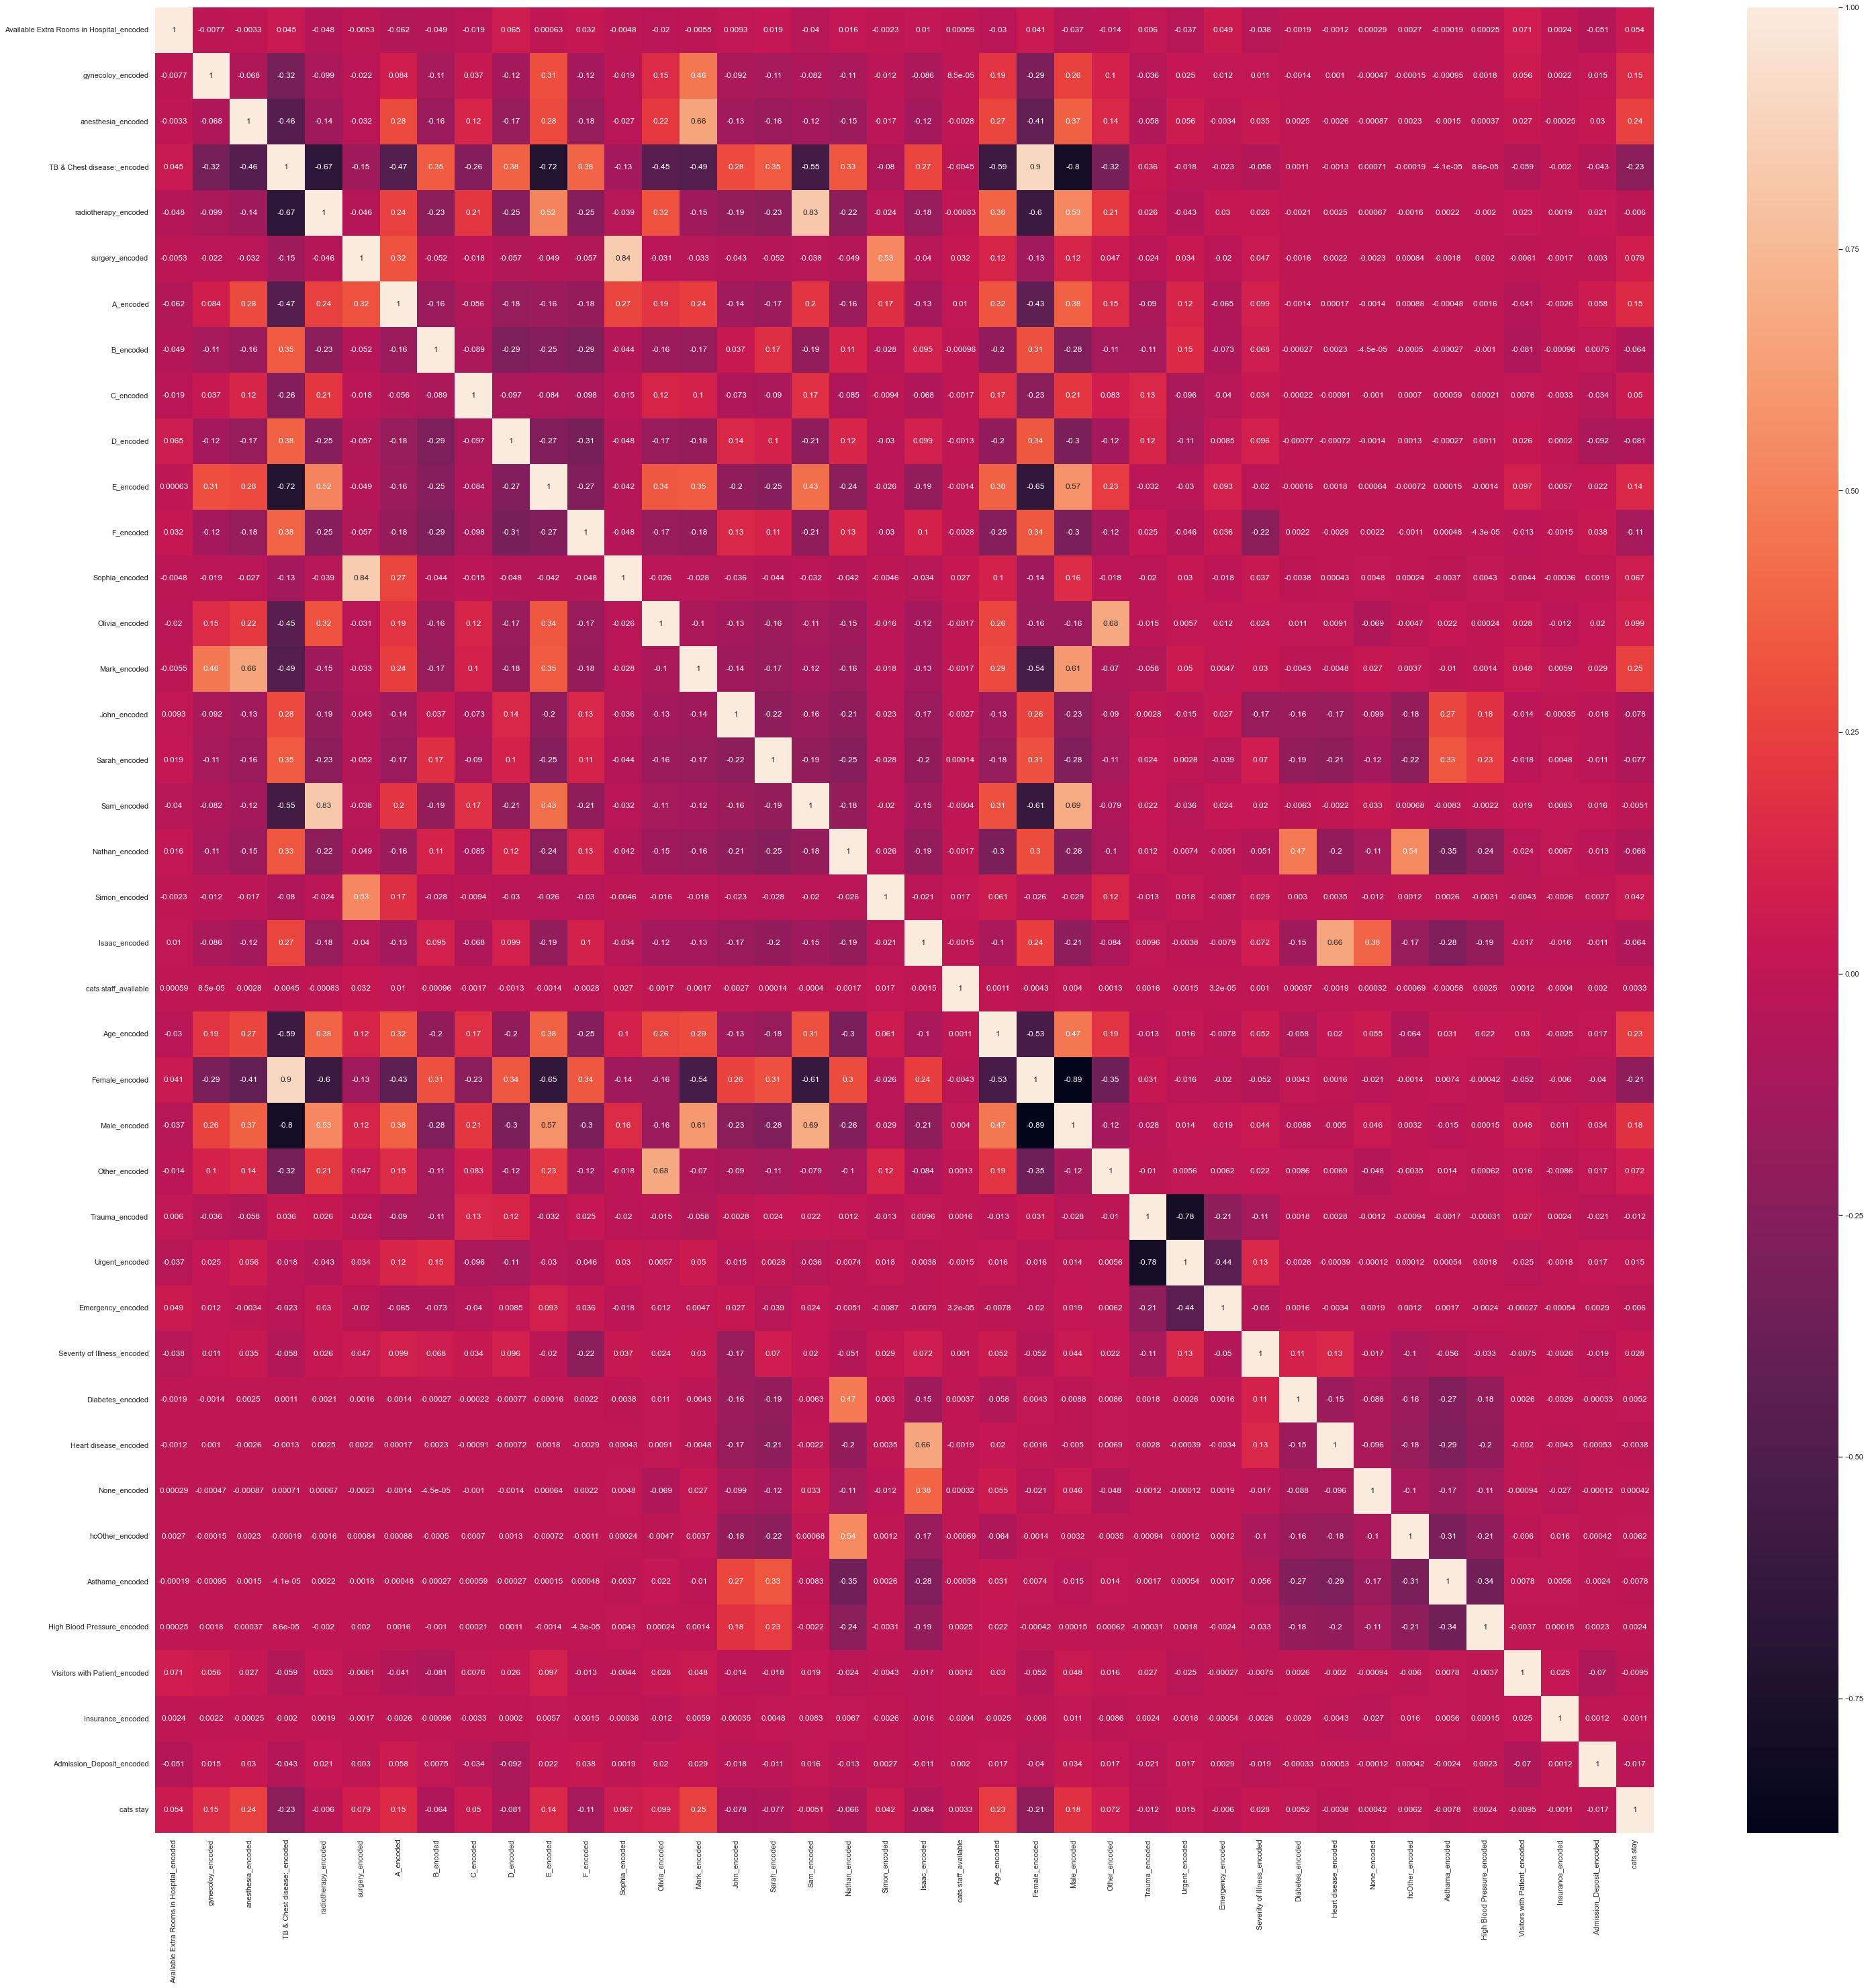

In [82]:
#CON OUTLIER
corr = dftrainfinal.corr()
sns.set(rc = {'figure.figsize':(50,50)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

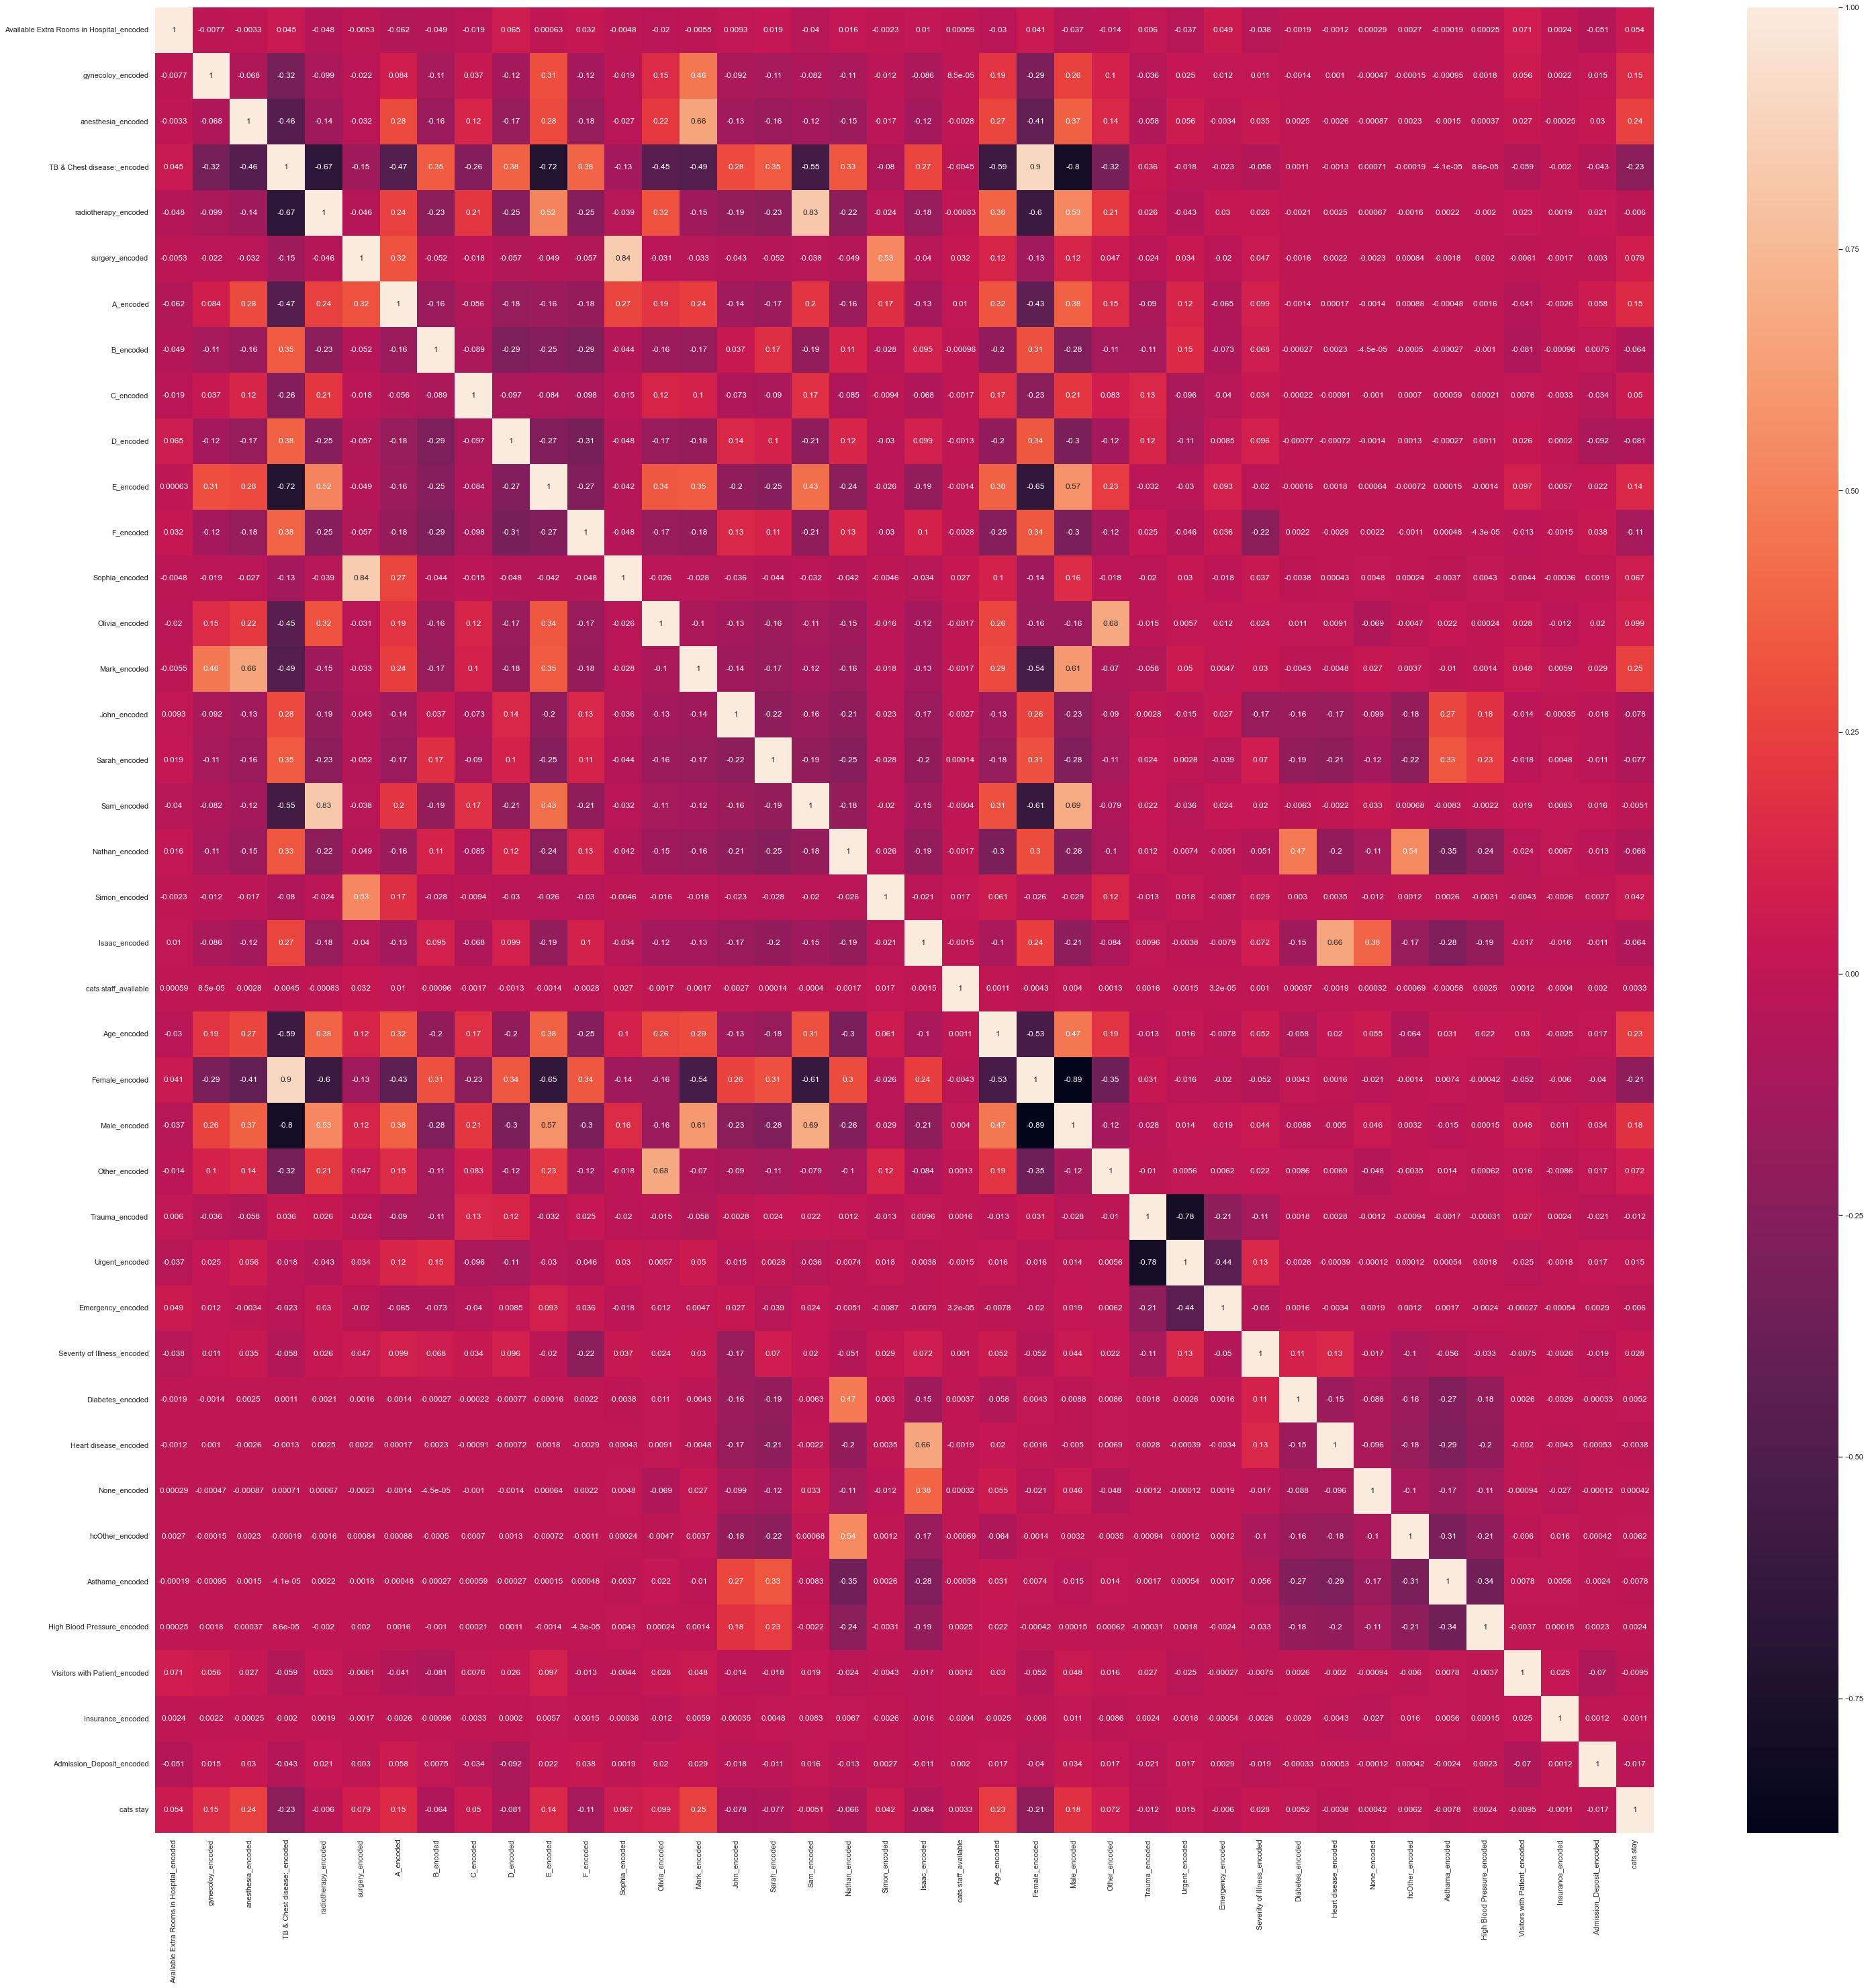

In [83]:
#SIN OUTLIER
corrno = dftrainfinalno.corr()
sns.set(rc = {'figure.figsize':(50,50)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

In [84]:
#buscando columnas con correlacion <0.01
corr2=corr["cats stay"][abs(corr["cats stay"]) <0.01]
list2=list(corr2.index)
print(list2)

['radiotherapy_encoded', 'Sam_encoded', 'cats staff_available', 'Emergency_encoded', 'Diabetes_encoded', 'Heart disease_encoded', 'None_encoded', 'hcOther_encoded', 'Asthama_encoded', 'High Blood Pressure_encoded', 'Visitors with Patient_encoded', 'Insurance_encoded']


In [85]:
print(corr2)

radiotherapy_encoded            -0.005953
Sam_encoded                     -0.005096
cats staff_available             0.003305
Emergency_encoded               -0.005982
Diabetes_encoded                 0.005211
Heart disease_encoded           -0.003826
None_encoded                     0.000423
hcOther_encoded                  0.006233
Asthama_encoded                 -0.007809
High Blood Pressure_encoded      0.002432
Visitors with Patient_encoded   -0.009529
Insurance_encoded               -0.001063
Name: cats stay, dtype: float64


In [86]:
#buscando columnas con correlacion <0.1
corr3=corr["cats stay"][abs(corr["cats stay"]) <0.1]
list3=list(corr3.index)
print(list3)

['Available Extra Rooms in Hospital_encoded', 'radiotherapy_encoded', 'surgery_encoded', 'B_encoded', 'C_encoded', 'D_encoded', 'Sophia_encoded', 'Olivia_encoded', 'John_encoded', 'Sarah_encoded', 'Sam_encoded', 'Nathan_encoded', 'Simon_encoded', 'Isaac_encoded', 'cats staff_available', 'Other_encoded', 'Trauma_encoded', 'Urgent_encoded', 'Emergency_encoded', 'Severity of Illness_encoded', 'Diabetes_encoded', 'Heart disease_encoded', 'None_encoded', 'hcOther_encoded', 'Asthama_encoded', 'High Blood Pressure_encoded', 'Visitors with Patient_encoded', 'Insurance_encoded', 'Admission_Deposit_encoded']


In [87]:
print(corr3)

Available Extra Rooms in Hospital_encoded    0.053894
radiotherapy_encoded                        -0.005953
surgery_encoded                              0.078740
B_encoded                                   -0.064377
C_encoded                                    0.050095
D_encoded                                   -0.081017
Sophia_encoded                               0.066519
Olivia_encoded                               0.099091
John_encoded                                -0.077513
Sarah_encoded                               -0.077157
Sam_encoded                                 -0.005096
Nathan_encoded                              -0.065817
Simon_encoded                                0.041826
Isaac_encoded                               -0.063904
cats staff_available                         0.003305
Other_encoded                                0.072283
Trauma_encoded                              -0.012470
Urgent_encoded                               0.015249
Emergency_encoded           

## SEGUNDA  Y TERCERA MUESTRA CON Y SIN OUTLIER

In [88]:
#quitando las variables con menos correlacion segundo caso, corr > 0.1
dftrainfinal2=dftrainfinal.drop(columns=list2) #410000x28
dftrainfinal2x=dftrainfinal2.drop(columns="cats stay") #410000x27 
dftrainfinal2y=dftrainfinal2["cats stay"] #410000x1
#quitando las variables con menos correlacion tercer caso, corr > 0.01
dftrainfinal3=dftrainfinal.drop(columns=list3) #410000x11
dftrainfinal3x=dftrainfinal3.drop(columns="cats stay") #410000x10
dftrainfinal3y=dftrainfinal3["cats stay"] #410000x1

#para el dataframe sin outlieres
#quitando las variables con menos correlacion segundo caso, corr > 0.1
dftrainfinalno2=dftrainfinalno.drop(columns=list2) # 406050x28
dftrainfinalno2x=dftrainfinalno2.drop(columns="cats stay") # 406050x27
dftrainfinalno2y=dftrainfinalno2["cats stay"] #406050x1
#quitando las variables con menos correlacion tercer caso, corr > 0.01
dftrainfinalno3=dftrainfinalno.drop(columns=list3) # 406050x11
dftrainfinalno3x=dftrainfinalno3.drop(columns="cats stay") # 406050x10
dftrainfinalno3y=dftrainfinalno3["cats stay"] # 406050x1

# SE REPITE LOS PROCESO DE FEATURE ENGINEER Y FEATURED ENCODING USADOS EN EL CSV "hospitalizaciones_train" EN EL CSV DE "hospitalizaciones_test"

In [89]:
dftest = pd.read_csv("Archivos train y test/hospitalizaciones_test.csv")
dftest.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [90]:
#explorando las variables unicas
for i in range(14):
    print (dftest.columns[i])
    print(dftest.iloc[:,i].unique())
    print("\n")

Available Extra Rooms in Hospital
[ 3  2  4  5  1  9  6 10 13 11 24 20  7 14 12  0 21  8]


Department
['gynecology' 'TB & Chest disease' 'radiotherapy' 'anesthesia' 'surgery']


Ward_Facility_Code
['F' 'E' 'A' 'D' 'B' 'C']


doctor_name
['Dr Olivia' 'Dr John' 'Dr Sam' 'Dr Sarah' 'Dr Sophia' 'Dr Nathan'
 'Dr Mark' 'Dr Isaac' 'Dr Simon']


staff_available
[10  4  7  1  6  5  8  0  9  3  2]


patientid
[  2858  65657  45598 ...  75642 118184  33937]


Age
['21-30' '51-60' '71-80' '41-50' '31-40' '0-10' '61-70' '11-20' '81-90'
 '91-100']


gender
['Female' 'Other' 'Male']


Type of Admission
['Trauma' 'Urgent' 'Emergency']


Severity of Illness
['Moderate' 'Extreme' 'Minor']


health_conditions
['Other' 'Asthama' 'None' 'Diabetes' 'Heart disease' 'High Blood Pressure']


Visitors with Patient
[ 2  3  4  8  6 13 14  5  9  1 10  7 12 23 11 19 22  0 17 32 15 24 18 16
 20 21 25 30]


Insurance
['No' 'Yes']


Admission_Deposit
[4749.640225 4122.261324 5459.067882 ... 5456.930075 4694.127772
 4

In [91]:
#No hay valores nulos
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

In [92]:
#No hay valores duplicados
dftest[dftest.duplicated()]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit


In [93]:
#Encoding de la columna Available Extra Rooms in Hospital
scaler = MinMaxScaler() 
dftest["Available Extra Rooms in Hospital_encoded"]=scaler.fit_transform(dftest[["Available Extra Rooms in Hospital"]])

In [94]:
#Encoding de la columna Department
enc = OneHotEncoder(sparse=False)
departamentos=dftest["Department"].values.reshape(-1,1)
enc.fit(departamentos)
enc2=enc.transform(departamentos)
print(enc.categories_)
dftest["gynecoloy_encoded"]=enc2[:,0]
dftest["anesthesia_encoded"]=enc2[:,1]
dftest["TB & Chest disease:_encoded"]=enc2[:,2]
dftest["radiotherapy_encoded"]=enc2[:,3]
dftest["surgery_encoded"]=enc2[:,4]

[array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'], dtype=object)]


In [95]:
#Encoding de la columna Ward_Facility_Code
enc = OneHotEncoder(sparse=False)
wardcode=dftest["Ward_Facility_Code"].values.reshape(-1,1)
enc.fit(wardcode)
enc2=enc.transform(wardcode)
print(enc.categories_)
dftest["A_encoded"]=enc2[:,0]
dftest["B_encoded"]=enc2[:,1]
dftest["C_encoded"]=enc2[:,2]
dftest["D_encoded"]=enc2[:,3]
dftest["E_encoded"]=enc2[:,4]
dftest["F_encoded"]=enc2[:,5]

[array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)]


In [96]:
#Encoding de la columna doctor_name
enc = OneHotEncoder(sparse=False)
wardcode=dftest["doctor_name"].values.reshape(-1,1)
enc.fit(wardcode)
enc2=enc.transform(wardcode)
print(enc.categories_)
dftest["Sophia_encoded"]=enc2[:,0]
dftest["Olivia_encoded"]=enc2[:,1]
dftest["Mark_encoded"]=enc2[:,2]
dftest["John_encoded"]=enc2[:,3]
dftest["Sarah_encoded"]=enc2[:,4]
dftest["Sam_encoded"]=enc2[:,5]
dftest["Nathan_encoded"]=enc2[:,6]
dftest["Simon_encoded"]=enc2[:,7]
dftest["Isaac_encoded"]=enc2[:,8]

[array(['Dr Isaac', 'Dr John', 'Dr Mark', 'Dr Nathan', 'Dr Olivia',
       'Dr Sam', 'Dr Sarah', 'Dr Simon', 'Dr Sophia'], dtype=object)]


In [97]:
#Encoding de la columna staff_available
bins=[-1,0,10]
labels=[0,1]
cats=pd.cut(dftest["staff_available"],bins, labels = labels)
dftest["cats staff_available"]=cats
dftest["cats staff_available"]=pd.factorize(dftest['cats staff_available'])[0]

In [98]:
#Encoding de la columna age y reescalando con Minmax
y_encoder = LabelEncoder().fit(dftest['Age'])
dftest["Age_encoded"] = y_encoder.transform(dftest['Age'])
scaler = MinMaxScaler() 
dftest["Age_encoded"]=scaler.fit_transform(dftest[["Age_encoded"]])

In [99]:
#Encoding de la columna gender
enc = OneHotEncoder(sparse=False)
genero=dftest["gender"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftest["Female_encoded"]=enc2[:,0]
dftest["Male_encoded"]=enc2[:,1]
dftest["Other_encoded"]=enc2[:,2]

[array(['Female', 'Male', 'Other'], dtype=object)]


In [100]:
#Encoding de la columna Type of Admission
enc = OneHotEncoder(sparse=False)
genero=dftest["Type of Admission"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftest["Trauma_encoded"]=enc2[:,0]
dftest["Urgent_encoded"]=enc2[:,1]
dftest["Emergency_encoded"]=enc2[:,2]

[array(['Emergency', 'Trauma', 'Urgent'], dtype=object)]


In [101]:
#Encoding de la columna Severity of Illness y reescalando con MinMaxScaler() 
dftest["Severity of Illness_encoded"]=dftest["Severity of Illness"]
dftest["Severity of Illness_encoded"].replace("Minor",0,inplace=True)
dftest["Severity of Illness_encoded"].replace("Moderate",1,inplace=True)
dftest["Severity of Illness_encoded"].replace("Extreme",2,inplace=True)
scaler = MinMaxScaler() 
dftest["Severity of Illness_encoded"]=scaler.fit_transform(dftest[["Severity of Illness_encoded"]])

In [102]:
#Encodign de la columna health_conditions
enc = OneHotEncoder(sparse=False)
genero=dftest["health_conditions"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftest["Diabetes_encoded"]=enc2[:,0]
dftest["Heart disease_encoded"]=enc2[:,1]
dftest["None_encoded"]=enc2[:,2]
dftest["hcOther_encoded"]=enc2[:,3]
dftest["Asthama_encoded"]=enc2[:,4]
dftest["High Blood Pressure_encoded"]=enc2[:,5]

[array(['Asthama', 'Diabetes', 'Heart disease', 'High Blood Pressure',
       'None', 'Other'], dtype=object)]


In [103]:
#Encoding de la  Visitors with Patient
scaler = MinMaxScaler() 
dftest["Visitors with Patient_encoded"]=scaler.fit_transform(dftest[["Visitors with Patient"]])

In [104]:
#Encoding de la columna 'Insurance'
y_encoder = LabelEncoder()
dftest["Insurance_encoded"] = y_encoder.fit_transform(dftest['Insurance'])

In [105]:
#Encoding de la columna "Admission_Deposit
scaler=StandardScaler()
dftest["Admission_Deposit_encoded"]= scaler.fit_transform(dftest[["Admission_Deposit"]])

### SE OBTIENE 6 DIFERENTES DATAFRAME CON DISTINTAS CANTIDAD DE COLUMNA  3 CON OUTLIERS Y 3 SIN OUTLIERS PARA MULTIPLES EVALUACIONES

In [106]:
#Dataframefinal con outliers
dftestfinal=dftest.drop(columns=list(dftrain.columns)[0:14]) #90000 x 39 
#quitando las variables con menos correlacion para segundo caso
dftestfinal2=dftestfinal.drop(columns=list2) #90000 x 27
#quitando las variables con menos correlacion tercer caso
dftestfinal3=dftestfinal.drop(columns=list3) #90000 x 10

#Dataframefinal sin outliers
dftestfinalno=dftestfinal[abs(dftestfinal["Admission_Deposit_encoded"])<3] #89102 x 39 
dftestfinalno2=dftestfinalno.drop(columns=list2) #89102 x 27
dftestfinalno3=dftestfinalno.drop(columns=list3) #89102 x 10


# PROBANDO MODELOS 

## PRUEBAS CON DECISIONTREECASSIFIER :

PRIMERA PRUEBA :

In [46]:
#Para muestra trainfinal se realiza un split con 30% de datos para test y 70 % para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(dftrainfinalx, dftrainfinaly, test_size=0.30, random_state=40)

In [164]:
#Busqueda de los mejores hiperparámetros
param_dist = {'criterion':["gini", "entropy", "log_loss"],
              'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30], }

tree= DecisionTreeClassifier()
model = GridSearchCV(tree, param_dist, cv=5,scoring="accuracy")

model.fit(X_train, y_train)
model.best_params_

{'criterion': 'gini', 'max_depth': 22}

In [ ]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)

In [54]:
#Se entrena el modelo con los mejores hiperparámetros
tree2=DecisionTreeClassifier(max_depth=22,criterion="gini")
tree2.fit(X_train,y_train)
y_predtrain=tree2.predict(X_train)
y_predtest=tree2.predict(X_test)

In [55]:
# Se evalua el accuracy y recall para train y test.
print(f"El acurracy para train es : {accuracy_score(y_train,y_predtrain)}")
print(f"El recall para train es : {recall_score(y_train,y_predtrain)}")
print(f"El acurracy para test es : {accuracy_score(y_test,y_predtest)}")
print(f"El recall  para test es : {recall_score(y_test,y_predtest)}")

El acurracy para train es : 0.8788501742160278
El recall para train es : 0.9054905490549054
El acurracy para test es : 0.7780487804878049
El recall  para test es : 0.8231497811744726


In [56]:
#Comprobamos con una validacion cruzada el modelo.
cross_val_score(tree2,dftrainfinalx,dftrainfinaly,cv=5,scoring="accuracy")

array([0.77767073, 0.78179268, 0.78185366, 0.78031707, 0.7780122 ])

In [ ]:
#exportando a csv la prediccion para testinal
y_predtesttest=tree2.predict(dftestfinal)
y_predtestcsv=pd.DataFrame(list(y_predtesttest),columns=["pred"])
y_predtestcsv.to_csv("pred/isaacpc94.csv",index=False)

SEGUNDA PRUEBA:

In [57]:
#Para muestra trainfinal2 se realiza un split con 30% de datos para test y 70 % para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(dftrainfinal2x, dftrainfinal2y, test_size=0.30, random_state=40)

In [353]:
#Busqueda de los mejores hiperparámetros
param_dist = {'criterion':["gini", "entropy", "log_loss"],
              'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], }

tree= DecisionTreeClassifier()
model = GridSearchCV(tree, param_dist, cv=5,scoring="accuracy")


model.fit(X_train, y_train)
model.best_params_

{'criterion': 'log_loss', 'max_depth': 20}

In [363]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)

In [58]:
#Se entrena el modelo con los mejores hiperparámetros
tree2=DecisionTreeClassifier(max_depth=20,criterion="log_loss")
tree2.fit(X_train,y_train)
y_predtrain=tree2.predict(X_train)
y_predtest=tree2.predict(X_test)

In [59]:
# Se evalua el accuracy y recall para train y test.
print(f"El acurracy para train es : {accuracy_score(y_train,y_predtrain)}")
print(f"El recall para train es : {recall_score(y_train,y_predtrain)}")
print(f"El acurracy para test es : {accuracy_score(y_test,y_predtest)}")
print(f"El recall  para test es : {recall_score(y_test,y_predtest)}")

El acurracy para train es : 0.8192195121951219
El recall para train es : 0.8624204035310363
El acurracy para test es : 0.7670487804878049
El recall  para test es : 0.8199229211574891


TERCERA PRUEBA:

In [64]:
#Prediccion para muestra trainfinal3 se realiza un split con 30% de datos para test y 70 % para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(dftrainfinal3x, dftrainfinal3y, test_size=0.30, random_state=40)

In [378]:
#Busqueda de los mejores hiperparámetros
param_dist = {'criterion':["gini", "entropy", "log_loss"],
              'max_depth': [1,2,3,4,5,6,7,8,9,10], }

tree= DecisionTreeClassifier()
model = GridSearchCV(tree, param_dist, cv=5,scoring="accuracy")

model.fit(X_train, y_train)
model.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [379]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)

In [65]:
#Se entrena el modelo con los mejores hiperparámetros
tree2=DecisionTreeClassifier(max_depth=7,criterion="gini")
tree2.fit(X_train,y_train)
y_predtrain=tree2.predict(X_train)
y_predtest=tree2.predict(X_test)

In [67]:
# Se evalua el accuracy y recall para train y test.
print(f"El acurracy para train es : {accuracy_score(y_train,y_predtrain)}")
print(f"El recall para train es : {recall_score(y_train,y_predtrain)}")
print(f"El acurracy para test es : {accuracy_score(y_test,y_predtest)}")
print(f"El recall  para test es : {recall_score(y_test,y_predtest)}")

El acurracy para train es : 0.6846968641114982
El recall para train es : 0.9952256095174735
El acurracy para test es : 0.684609756097561
El recall  para test es : 0.9953360768175583


## PRUEBAS CON KNEIGHBORSCLASSIFIER :

CUARTA PRUEBA:

In [68]:
#Para muestra trainfinal se realiza un split con 30% de datos para test y 70 % para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(dftrainfinalx, dftrainfinaly, test_size=0.30, random_state=40)

In [413]:
#Busqueda de los mejores hiperparámetros
param_grid = {'n_neighbors':np.arange(1, 10),
              }
knn = KNeighborsClassifier()

model = RandomizedSearchCV(knn, param_grid, n_iter=5,cv=5,scoring="accuracy")

model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 1}

In [414]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)

In [69]:
#Se entrena el modelo con los mejores hiperparámetros
knn2=KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)
y_predtrain=knn2.predict(X_train)
y_predtest=knn2.predict(X_test)

In [73]:
#Se evalua el accuracy y recall para train y test.
print(f"El acurracy para train es : {accuracy_score(y_train,y_predtrain)}")
print(f"El recall para train es : {recall_score(y_train,y_predtrain)}")
print(f"El acurracy para test es : {accuracy_score(y_test,y_predtest)}")
print(f"El recall  para test es : {recall_score(y_test,y_predtest)}")

El acurracy para train es : 1.0
El recall para train es : 1.0
El acurracy para test es : 0.7290975609756097
El recall  para test es : 0.7788229146253838


QUINTA PRUEBA:

In [74]:
#Para muestra finaltrain2 se realiza un split con 30% de datos para test y 70 % para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(dftrainfinal2x, dftrainfinal2y, test_size=0.30, random_state=40)

In [419]:
#Busqueda de los mejores hiperparámetros

param_grid = {'n_neighbors':np.arange(1, 10),
              }
knn = KNeighborsClassifier()

model = RandomizedSearchCV(knn, param_grid, n_iter=5,cv=5,scoring="accuracy")

model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 5}

In [420]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)

In [75]:
#Se entrena el modelo con los mejores hiperparámetros
knn2=KNeighborsClassifier()
knn2.fit(X_train, y_train)
y_predtrain=knn2.predict(X_train)
y_predtest=knn2.predict(X_test)

In [76]:
#Se evalua el accuracy y recall para train y test.
print(f"El acurracy para train es : {accuracy_score(y_train,y_predtrain)}")
print(f"El recall para train es : {recall_score(y_train,y_predtrain)}")
print(f"El acurracy para test es : {accuracy_score(y_test,y_predtest)}")
print(f"El recall  para test es : {recall_score(y_test,y_predtest)}")

El acurracy para train es : 0.8421672473867596
El recall para train es : 0.8806849629062286
El acurracy para test es : 0.7640162601626016
El recall  para test es : 0.8168267032464563


SEXTA PRUEBA :

In [102]:
#Para muestra finaltrain3 se realiza un split con 30% de datos para test y 70 % para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(dftrainfinal3x, dftrainfinal3y, test_size=0.30, random_state=40)

In [425]:
#busqueda de hiperparámetros

param_grid = {'n_neighbors':np.arange(1, 10),
              }
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, param_grid, n_iter=5,cv=5,scoring="accuracy")

model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 8}

In [426]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)

In [103]:
#Se entrena el modelo con los mejores hiperparámetros
knn2=KNeighborsClassifier(n_neighbors=8)
knn2.fit(X_train, y_train)
y_predtrain=knn2.predict(X_train)
y_predtest=knn2.predict(X_test)

In [105]:
#Se evalua el accuracy y recall para train y test.
print(f"El acurracy para train es : {accuracy_score(y_train,y_predtrain)}")
print(f"El recall para train es : {recall_score(y_train,y_predtrain)}")
print(f"El acurracy para test es : {accuracy_score(y_test,y_predtest)}")
print(f"El recall  para test es : {recall_score(y_test,y_predtest)}")

El acurracy para train es : 0.6495540069686411
El recall para train es : 0.6568420817237003
El acurracy para test es : 0.6524878048780488
El recall  para test es : 0.6594552224181853


## PRUEBA CON OUTLIER Y CON DECISIONTREECASSIFIER :

SÉPTIMA PRUEBA : 

In [89]:
#Para muestra finaltrailno se realiza un split con 30% de datos para test y 70 % para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(dftrainfinalnox, dftrainfinalnoy, test_size=0.30, random_state=40)

In [90]:
#busqueda de hiperparámetros
param_dist = {'criterion':["gini", "entropy", "log_loss"],
              'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30], }

tree= DecisionTreeClassifier()
model = GridSearchCV(tree, param_dist, cv=5,scoring="accuracy")

model.fit(X_train, y_train)
model.best_params_

{'criterion': 'gini', 'max_depth': 22}

In [98]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)

In [91]:
#Se entrena el modelo con los mejores hiperparámetros
tree2=DecisionTreeClassifier(max_depth=22,criterion="gini")
tree2.fit(X_train,y_train)
y_predtrain=tree2.predict(X_train)
y_predtest=tree2.predict(X_test)

In [97]:
#Se evalua el accuracy y recall para train y test.
print(f"El acurracy para train es : {accuracy_score(y_train,y_predtrain)}")
print(f"El recall para train es : {recall_score(y_train,y_predtrain)}")
print(f"El acurracy para test es : {accuracy_score(y_test,y_predtest)}")
print(f"El recall  para test es : {recall_score(y_test,y_predtest)}")

El acurracy para train es : 0.892405931711436
El recall para train es : 0.9122828819160053
El acurracy para test es : 0.7791733366170012
El recall  para test es : 0.8215647339158062
